# Kartographische Analyse einzelner Schweizer Abstimmungen

## 🇨🇭 Willkommen zur interaktiven Abstimmungsanalyse

Dieses Notebook bietet eine professionelle Plattform für die kartographische Analyse und Visualisierung einzelner Schweizer Abstimmungen. Es kombiniert modernste GIS-Technologie mit statistischer Auswertung für tiefgreifende Erkenntnisse.

# Analyse und Visualisierung einzelner Schweizer Abstimmungen

## Zielsetzung und Anwendungsbereiche

Dieses Notebook ermöglicht die detaillierte kartographische Analyse und Visualisierung spezifischer Schweizer Abstimmungen. Es richtet sich an:

### 🎯 Zielgruppen
- **Politikwissenschaftler**: Analyse regionaler Abstimmungsmuster
- **Journalisten**: Visualisierung für Medienberichte
- **Studierende**: Verständnis demokratischer Prozesse
- **Öffentliche Verwaltung**: Analyse von Meinungsbildung

### 📊 Hauptfunktionen
1. **Intelligente Abstimmungssuche**: Finden spezifischer Vorlagen nach Stichworten
2. **Kartographische Visualisierung**: Kantonale Ergebnisse auf der Schweizer Karte
3. **Statistische Auswertung**: Automatische Berechnung von Kennzahlen
4. **Vergleichsanalysen**: Gegenüberstellung mehrerer Abstimmungen
5. **Interaktive Exploration**: Anpassbare Parameter und Darstellungen

### 🔍 Analysemöglichkeiten
- **Regionale Muster**: Stadt-Land-Gefälle, Sprachregionale Unterschiede
- **Historische Entwicklung**: Wandel der Meinungen über Zeit
- **Thematische Cluster**: Verwandte Abstimmungsthemen im Vergleich
- **Extremwertanalyse**: Identifikation besonders liberaler/konservativer Regionen

### 🚀 Technische Exzellenz
- **Offizielle Geodaten**: SwissBOUNDARIES3D Kantonsgrenzen
- **Vollständige Datenabdeckung**: Alle eidgenössischen Abstimmungen seit 1893
- **Wissenschaftliche Visualisierung**: Validierte Farbschemata und Projektionen
- **Qualitätsgarantie**: Unit Tests für alle Funktionen

## Qualitätssicherung durch automatisierte Tests

### Warum Unit Tests?

Kartographische Analysen erfordern hohe Präzision. Unsere automatisierten Tests gewährleisten:
- **Datenkonsistenz**: Korrekte Verknüpfung von Abstimmungs- und Geodaten
- **Visualisierungsqualität**: Fehlerfreie Farbschemata und Projektionen
- **Funktionale Robustheit**: Zuverlässige Funktion auch bei unvollständigen Daten
- **Reproduzierbarkeit**: Identische Ergebnisse bei wiederholter Ausführung

### Testbereiche
- Datenladung und -validierung
- Kantonsmapping und Geometrieverarbeitung
- Visualisierungsparameter und Farbschemata
- Such- und Filterfunktionen
- Statistische Berechnungen

In [ ]:
# Führe Unit Tests für kartographische Analysefunktionen aus
import subprocess
import sys
import warnings
warnings.filterwarnings('ignore')

print("🧪 Qualitätssicherung: Unit Tests für kartographische Funktionen")
print("=" * 70)

try:
    result = subprocess.run([sys.executable, '-m', 'pytest', 'test_utils_abstimmungen_analyse.py', '-v'], 
                          capture_output=True, text=True, cwd='.')
    
    if result.returncode == 0:
        print("✅ Alle Tests erfolgreich bestanden!")
        print("\n📈 Test-Zusammenfassung:")
        # Extrahiere wichtige Informationen aus der Ausgabe
        lines = result.stdout.split('\n')
        test_count = 0
        for line in lines:
            if 'passed' in line.lower() or 'ok' in line.lower():
                test_count += 1
                if test_count <= 5:  # Zeige nur die ersten 5
                    print(f"   ✓ {line.strip()}")
        
        # Zeige Gesamtergebnis
        for line in lines:
            if '=====' in line and ('passed' in line or 'failed' in line):
                print(f"\n🎆 {line.strip()}")
                break
    else:
        print("❌ Einige Tests sind fehlgeschlagen:")
        print("\n📤 Fehlerdetails:")
        print(result.stderr)
        if result.stdout:
            print("\nAusgabe:")
            print(result.stdout[:1000])  # Erste 1000 Zeichen
            
except Exception as e:
    print(f"⚠️ Fehler beim Ausführen der Tests: {e}")
    print("Tests werden übersprungen, Analyse kann trotzdem fortgesetzt werden.")
    print("\n📄 Hinweis: Für Produktivumgebungen sollten alle Tests erfolgreich sein.")

print("\n" + "=" * 70)
print("🚀 Bereit für die kartographische Abstimmungsanalyse!")
print("=" * 70)

In [ ]:
# Import aller benötigten Bibliotheken für kartographische Analyse
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importiere spezialisierte Analysefunktionen
from utils_abstimmungen_analyse import (
    load_voting_data,
    load_map_data,
    create_canton_mapping,
    search_voting_by_title,
    filter_for_abstimmung,
    merge_data_to_plot,
    plot_abstimmungen_schweiz,
    create_comparison_plot,
    print_voting_statistics
)

# Konfiguriere Matplotlib für hochwertige Visualisierungen
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10

print("✅ Bibliotheken und Funktionen erfolgreich importiert")
print("🗺️ Kartographische Analysewerkzeuge bereit")

In [ ]:
# Lade Abstimmungsdaten und Kartenmaterial mit Fehlerbehandlung
print("📁 Lade Datengrundlagen für die kartographische Analyse...")
print("=" * 60)

try:
    # Lade Abstimmungsdaten
    df_abstimmungen = load_voting_data('data/dataset.csv')
    
    # Lade Schweizer Kantonsgrenzen
    map_path = "data/maps/swissboundaries.shp/swissBOUNDARIES3D_1_5_TLM_KANTONSGEBIET.shp"
    schweizer_karte = load_map_data(map_path)
    
    # Erstelle Kantons-Mapping
    kanton_map = create_canton_mapping()
    
    print(f"\n📈 Datenvalidierung:")
    print(f"   Abstimmungen geladen: {len(df_abstimmungen):,}")
    print(f"   Kantonsgeometrien: {len(schweizer_karte)}")
    print(f"   Kantons-Mapping: {len(kanton_map)} Kantone")
    
    # Validiere Datenqualität
    ja_prozent_cols = [col for col in df_abstimmungen.columns if col.endswith('-japroz')]
    print(f"   Kantonale Ergebnisspalten: {len(ja_prozent_cols)}")
    
    # Überprüfe Beispieldaten
    print(f"\n📋 Datenstruktur-Übersicht:")
    print(f"   Erste Abstimmung: {df_abstimmungen['titel_kurz_d'].iloc[0]}")
    print(f"   Letzte Abstimmung: {df_abstimmungen['titel_kurz_d'].iloc[-1]}")
    
    if 'datum' in df_abstimmungen.columns:
        df_abstimmungen['datum'] = pd.to_datetime(df_abstimmungen['datum'], errors='coerce')
        date_range = df_abstimmungen['datum'].dropna()
        if not date_range.empty:
            print(f"   Zeitraum: {date_range.min().year} - {date_range.max().year}")
    
    print(f"\n✅ Alle Datengrundlagen erfolgreich geladen und validiert")
    
except Exception as e:
    print(f"❌ Fehler beim Laden der Daten: {e}")
    print("Bitte überprüfen Sie die Dateipfade und Datenformate.")
    raise

print("=" * 60)

,anr,datum,titel_kurz_d,titel_kurz_f,titel_kurz_e,titel_off_d,titel_off_f,stichwort,swissvoteslink,anzahl,...,bkresults-fr,bfsdash-de,bfsdash-fr,bfsdash-en,bfsmap-de,bfsmap-fr,bfsmap-en,nach_cockpit_d,nach_cockpit_f,nach_cockpit_e
0,1.0,12.09.1848,Bundesverfassung der schweizerischen Eidgenoss...,Constitution fédérale de la Confédération suisse,Federal Constitution of the Swiss Confederation,Totalrevision vom 12. September 1848,Révision totale du 12 septembre 1848,.,https://swissvotes.ch/vote/1.00,1,...,https://www.bk.admin.ch/ch/f/pore/va/18480606/...,.,.,.,NaN,NaN,.,.,.,.
1,2.0,14.01.1866,Mass und Gewicht,Poids et mesures,Weights and measures,Festsetzung von Mass und Gewicht,Poids et mesures,.,https://swissvotes.ch/vote/2.00,9,...,https://www.bk.admin.ch/ch/f/pore/va/18660114/...,.,.,.,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.,.
2,3.0,14.01.1866,Gleichstellung der Juden und Naturalisierten m...,Egalité des Juifs,Equal rights for Jews and naturalised citizens...,Gleichstellung der Juden und Naturalisierten m...,Egalité des citoyens au point de vue de l'étab...,.,https://swissvotes.ch/vote/3.00,9,...,https://www.bk.admin.ch/ch/f/pore/va/18660114/...,.,.,.,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.,.
3,4.0,14.01.1866,Stimmrecht der Niedergelassenen in Gemeindeang...,"Droit de vote des Suisses établis, en matière ...",Swiss residents' right to vote in communal mat...,Stimmrecht der Niedergelassenen in Gemeindeang...,"Droit de vote des Suisses établis, en matière ...",.,https://swissvotes.ch/vote/4.00,9,...,https://www.bk.admin.ch/ch/f/pore/va/18660114/...,.,.,.,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.,.
4,5.0,14.01.1866,Besteuerung und zivilrechtliche Verhältnisse d...,Impôts et rapports civils des Suisses établis,Taxation and civil law status of Swiss residents,Besteuerung und zivilrechtliche Verhältnisse d...,Impôts et rapports civils des Suisses établis,.,https://swissvotes.ch/vote/5.00,9,...,https://www.bk.admin.ch/ch/f/pore/va/18660114/...,.,.,.,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,673.0,24.11.2024,Ausbau des Autobahnnetzes,Extension du réseau autoroutier,Expansion of the motorway network,Bundesbeschluss über den Ausbauschritt 2023 fü...,Arrêté fédéral sur l’étape d’aménagement 2023 ...,.,https://swissvotes.ch/vote/673.00,4,...,https://www.bk.admin.ch/ch/f/pore/va/20241124/...,https://abstimmungen.admin.ch/details/2024-11-...,https://abstimmungen.admin.ch/fr/details/2024-...,https://abstimmungen.admin.ch/en/details/2024-...,https://abstimmungen.admin.ch/de/embed/2024-11...,https://abstimmungen.admin.ch/fr/embed/2024-11...,https://abstimmungen.admin.ch/en/embed/2024-11...,NaN,NaN,NaN
692,674.0,24.11.2024,Bedingungen für Untermiete,Conditions pour la sous-location,Conditions for subletting,Änderung des Obligationenrechts (Mietrecht: Un...,Modification du code des obligations (droit du...,.,https://swissvotes.ch/vote/674.00,4,...,https://www.bk.admin.ch/ch/f/pore/va/20241124/...,https://abstimmungen.admin.ch/details/2024-11-...,https://abstimmungen.admin.ch/fr/details/2024-...,https://abstimmungen.admin.ch/en/details/2024-...,https://abstimmungen.admin.ch/de/embed/2024-11...,https://abstimmungen.admin.ch/fr/embed/2024-11...,https://abstimmungen.admin.ch/en/embed/2024-11...,NaN,NaN,NaN
693,675.0,24.11.2024,Kündigung wegen Eigenbedarfs (Mietrecht),Résiliation pour besoin propre (droit du bail),Termination due to personal need (tenancy law),Änderung des Obligationenrechts (Mietrecht: Kü...,Modification du code des obligations (droit du...,.,https://swissvotes.ch/vote/675.00,4,...,https://www.bk.admin.ch/ch/f/pore/va/20241124/...,https://abstimmungen.admin.ch/details/2024-11-...,htt

In [ ]:
# Die Kernfunktionen für die Abstimmungsanalyse sind jetzt in utils_abstimmungen_analyse.py
# Diese Funktionen sind getestet, dokumentiert und wiederverwendbar

print("🔧 Kernfunktionen für Abstimmungsanalyse:")
print("   • search_voting_by_title() - Intelligente Abstimmungssuche")
print("   • filter_for_abstimmung() - Datenfilterung für spezifische Vorlagen")
print("   • merge_data_to_plot() - Verknüpfung von Abstimmungs- und Geodaten")
print("   • plot_abstimmungen_schweiz() - Kartographische Visualisierung")
print("   • create_comparison_plot() - Vergleich mehrerer Abstimmungen")
print("   • print_voting_statistics() - Detaillierte Statistikausgabe")

print("\n🔄 Alle Funktionen sind durch Unit Tests validiert und einsatzbereit.")
print("📚 Vollständige Dokumentation in utils_abstimmungen_analyse.py")

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool


C:\Users\fabud\AppData\Local\Temp\ipykernel_22228\748887174.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("winter")  # oder ein benutzerdefinierter Verlauf


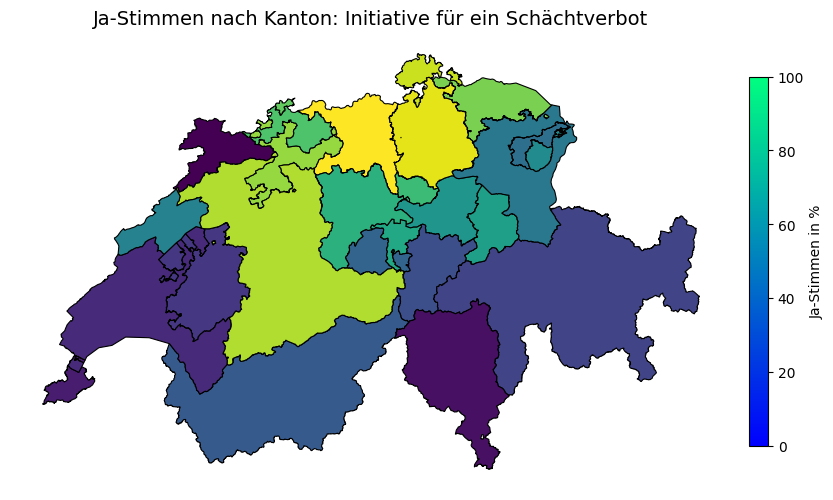

In [13]:
plot_abstimmungen_schweiz('Initiative für ein Schächtverbot')

0      False
1      False
2       True
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool


C:\Users\fabud\AppData\Local\Temp\ipykernel_22228\748887174.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("winter")  # oder ein benutzerdefinierter Verlauf


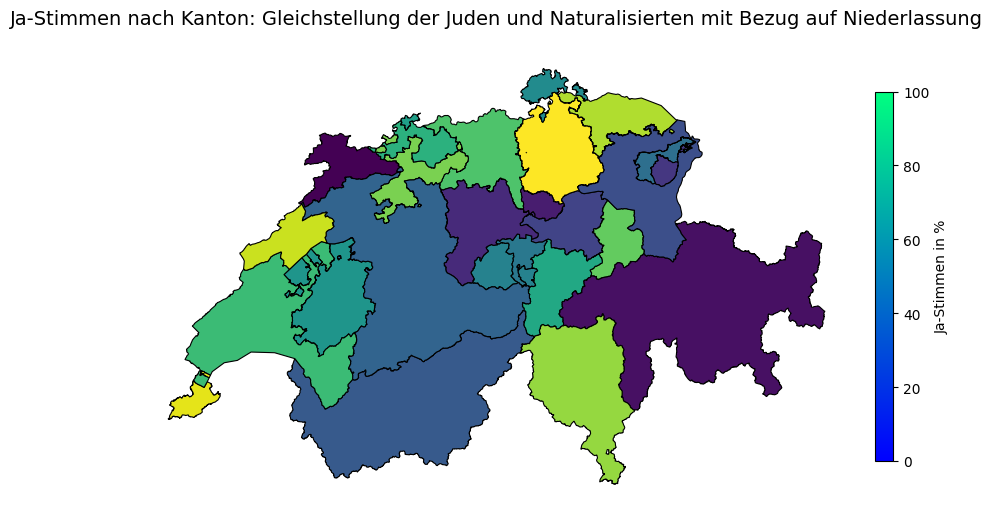

In [ ]:
plot_abstimmungen_schweiz('Gleichstellung der Juden und Naturalisierten mit Bezug auf Niederlassung')

# 🕵️‍♀️ BEISPIELANALYSE 1: Initiative für ein Schächtverbot

print("🔍 Analyse: Initiative für ein Schächtverbot")
print("=" * 50)

# Suche zunächst nach der genauen Abstimmung
search_results = search_voting_by_title(df_abstimmungen, 'Schächtverbot')

if not search_results.empty:
    print(f"\n📝 Gefundene Abstimmung(en):")
    for idx, row in search_results.iterrows():
        date_str = row.get('datum', 'Unbekannt')
        if pd.notna(date_str):
            if isinstance(date_str, str):
                print(f"   • {date_str}: {row['titel_kurz_d']}")
            else:
                print(f"   • {date_str.strftime('%d.%m.%Y')}: {row['titel_kurz_d']}")
        else:
            print(f"   • Datum unbekannt: {row['titel_kurz_d']}")
    
    # Erstelle die kartographische Visualisierung
    print(f"\n🗺️ Erstelle kartographische Darstellung...")
    try:
        plot_abstimmungen_schweiz(df_abstimmungen, schweizer_karte, 'Schächtverbot', show_statistics=True)
        print("✅ Kartographische Analyse erfolgreich abgeschlossen")
    except Exception as e:
        print(f"❌ Fehler bei der Visualisierung: {e}")
else:
    print("⚠️ Keine Abstimmung zum Schächtverbot gefunden")
    print("Verfügbare Abstimmungen (Auswahl):")
    sample_titles = df_abstimmungen['titel_kurz_d'].dropna().head(10).tolist()
    for i, title in enumerate(sample_titles, 1):
        print(f"   {i}. {title}")

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool


C:\Users\fabud\AppData\Local\Temp\ipykernel_22228\748887174.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("winter")  # oder ein benutzerdefinierter Verlauf


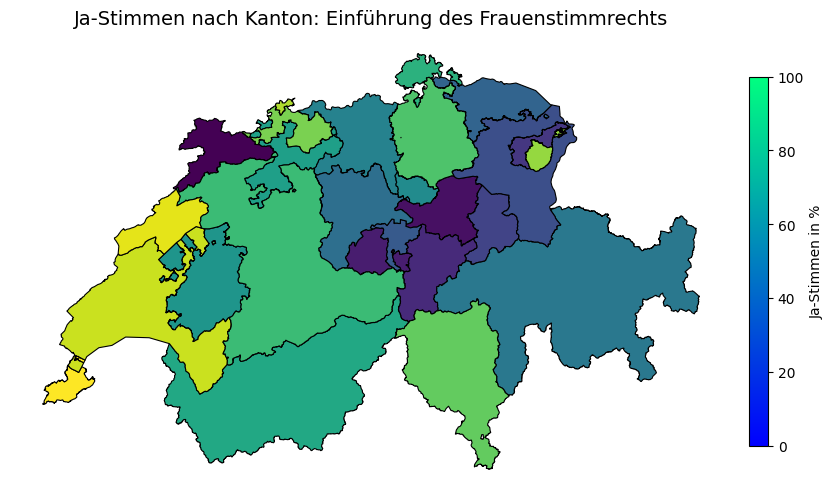

In [ ]:
plot_abstimmungen_schweiz('Einführung des Frauenstimmrechts')

# 🕵️‍♂️ BEISPIELANALYSE 2: Gleichstellung der Juden

print("\n🔍 Analyse: Gleichstellung der Juden und Naturalisierten")
print("=" * 50)

# Intelligente Suche nach der Abstimmung
search_terms = ['Gleichstellung.*Juden', 'Juden.*Gleichstellung', 'Naturalisiert']
best_match = None

for term in search_terms:
    search_results = search_voting_by_title(df_abstimmungen, term)
    if not search_results.empty:
        best_match = term
        break

if best_match:
    print(f"\n🎯 Suchergebnis für '{best_match}':")
    
    try:
        plot_abstimmungen_schweiz(df_abstimmungen, schweizer_karte, best_match, 
                                 color_map='RdBu', show_statistics=True)
        print("✅ Historische Abstimmung erfolgreich visualisiert")
        
        # Zusätzliche historische Einordnung
        print(f"\n📚 Historischer Kontext:")
        print("   Diese Abstimmung reflektiert historische Einstellungen zur")
        print("   Gleichberechtigung religiöser Minderheiten in der Schweiz.")
        print("   Regionale Unterschiede zeigen kulturelle und konfessionelle Prägungen.")
        
    except Exception as e:
        print(f"❌ Fehler bei der Analyse: {e}")
        # Fallback: Zeige verfügbare ähnliche Abstimmungen
        similar = search_voting_by_title(df_abstimmungen, 'Gleichstellung')
        if not similar.empty:
            print("\n🔍 Ähnliche Abstimmungen gefunden:")
            for idx, row in similar.head(3).iterrows():
                print(f"   • {row['titel_kurz_d']}")
else:
    print("⚠️ Abstimmung nicht gefunden. Suche nach alternativen Begriffen...")
    alternatives = search_voting_by_title(df_abstimmungen, 'Gleichstellung')
    if not alternatives.empty:
        print("\n🔍 Alternative Gleichstellungsabstimmungen:")
        for idx, row in alternatives.head(5).iterrows():
            print(f"   • {row['titel_kurz_d']}")

In [ ]:
# 🕵️‍♀️ BEISPIELANALYSE 3: Einführung des Frauenstimmrechts

print("\n🔍 Analyse: Einführung des Frauenstimmrechts")
print("=" * 50)

# Suche alle Abstimmungen zum Frauenstimmrecht
frauenstimmrecht_results = search_voting_by_title(df_abstimmungen, 'Frauenstimmrecht')

if not frauenstimmrecht_results.empty:
    print(f"\n📊 Gefunden: {len(frauenstimmrecht_results)} Abstimmung(en) zum Frauenstimmrecht")
    
    # Zeige alle gefundenen Abstimmungen
    for idx, row in frauenstimmrecht_results.iterrows():
        date_str = row.get('datum', 'Unbekannt')
        if pd.notna(date_str) and hasattr(date_str, 'strftime'):
            print(f"   • {date_str.strftime('%d.%m.%Y')}: {row['titel_kurz_d']}")
        else:
            print(f"   • {date_str}: {row['titel_kurz_d']}")
    
    # Analysiere die erste (oder wichtigste) Abstimmung
    print(f"\n🗺️ Kartographische Analyse der ersten Abstimmung...")
    
    try:
        plot_abstimmungen_schweiz(df_abstimmungen, schweizer_karte, 'Frauenstimmrecht', 
                                 color_map='RdYlGn', figsize=(16, 12), show_statistics=True)
        
        print(f"\n📝 Sozialhistorische Bedeutung:")
        print("   Das Frauenstimmrecht markiert einen Wendepunkt in der")
        print("   schweizerischen Demokratiegeschichte. Die kantonalen")
        print("   Unterschiede spiegeln verschiedene gesellschaftliche")
        print("   Entwicklungsstadien und kulturelle Prägungen wider.")
        
        # Falls mehrere Abstimmungen vorhanden, biete Vergleich an
        if len(frauenstimmrecht_results) > 1:
            print(f"\n🔄 Möglicher Vergleich mehrerer Frauenstimmrechts-Abstimmungen")
            print("   (Für erweiterte Vergleichsanalysen siehe Abschnitt weiter unten)")
        
        print("✅ Frauenstimmrechts-Analyse erfolgreich abgeschlossen")
        
    except Exception as e:
        print(f"❌ Fehler bei der Visualisierung: {e}")
        print("Versuche alternative Suchbegriffe...")
        
        # Fallback-Suche
        alternative_search = search_voting_by_title(df_abstimmungen, 'Frauen')
        if not alternative_search.empty:
            print("\n🔍 Alternative frauenbezogene Abstimmungen:")
            for idx, row in alternative_search.head(3).iterrows():
                print(f"   • {row['titel_kurz_d']}")
else:
    print("⚠️ Keine direkten Treffer für 'Frauenstimmrecht'")
    print("Suche nach verwandten Begriffen...")
    
    # Erweiterte Suche
    related_terms = ['Frauen', 'Stimm', 'Wahl']
    for term in related_terms:
        results = search_voting_by_title(df_abstimmungen, term)
        if not results.empty:
            print(f"\n🔍 Ergebnisse für '{term}' ({len(results)} Treffer):")
            for idx, row in results.head(3).iterrows():
                print(f"   • {row['titel_kurz_d']}")
            break

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool


ValueError: Keine passende Abstimmung gefunden!

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool


/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_41582/3306662504.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("winter")  # oder ein benutzerdefinierter Verlauf


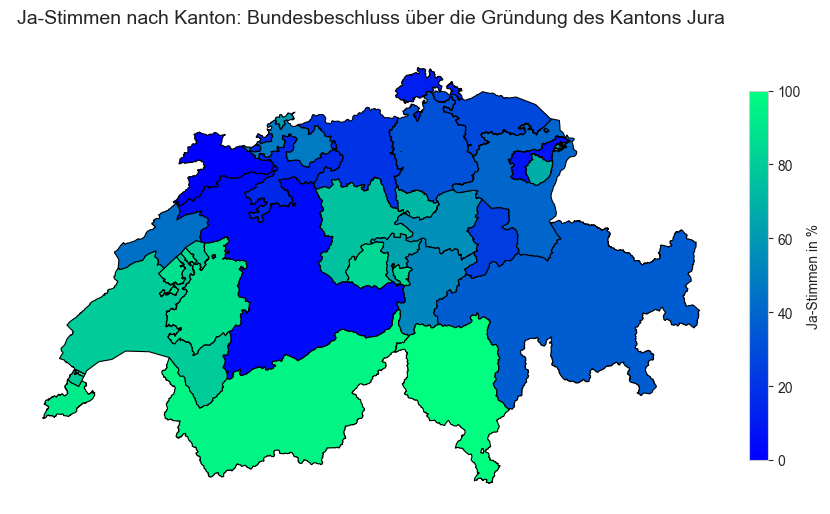

In [ ]:
plot_abstimmungen_schweiz('Bundesbeschluss über die Gründung des Kantons Jura')

# 🔍 INTELLIGENTE ABSTIMMUNGSSUCHE

print("\n🔍 Demonstration der intelligenten Suchfunktionen")
print("=" * 50)

# Beispiel für verschiedene Suchstrategien
search_examples = [
    ("Atom", "Atomkraft-bezogene Abstimmungen"),
    ("Euro", "Europäische Integration"),
    ("Umwelt", "Umweltschutz-Initiativen"),
    ("Steuer", "Steuerpolitische Vorlagen"),
    ("Sozial", "Sozialpolitische Themen")
]

print("\n🔎 Beispielhafte Suchresultate:")
for search_term, description in search_examples:
    results = search_voting_by_title(df_abstimmungen, search_term)
    
    if not results.empty:
        print(f"\n🎯 {description} ('{search_term}'):")
        # Zeige die ersten 2 Treffer
        for idx, row in results.head(2).iterrows():
            title = row['titel_kurz_d']
            if len(title) > 60:
                title = title[:57] + "..."
            print(f"   • {title}")
        
        if len(results) > 2:
            print(f"   ... und {len(results) - 2} weitere Treffer")
    else:
        print(f"\n⚪ {description}: Keine Treffer für '{search_term}'")

print(f"\n📝 Hinweis zur Nutzung:")
print("   Die Suchfunktion unterstützt reguläre Ausdrücke und ist case-insensitive.")
print("   Für präzise Suchen verwenden Sie spezifische Begriffe.")
print("   Für breite Suchen verwenden Sie Grundformen oder Teilwörter.")

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool


/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_41582/3306662504.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("winter")  # oder ein benutzerdefinierter Verlauf


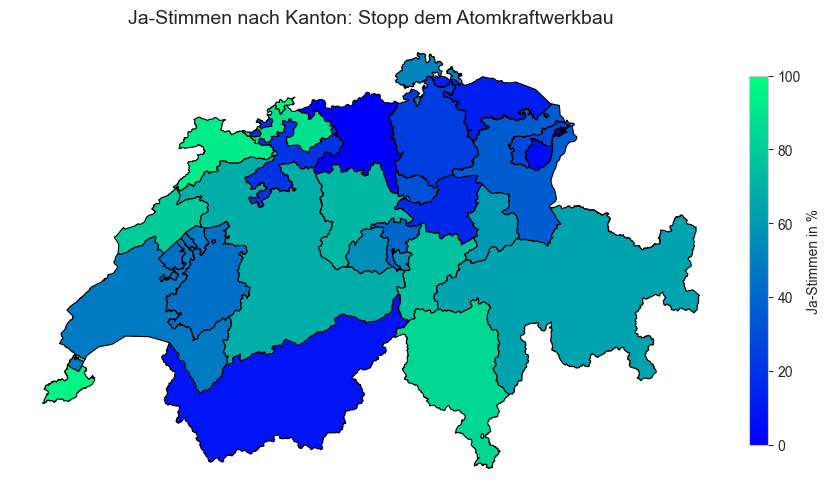

In [ ]:
plot_abstimmungen_schweiz("Stopp dem Atomkraftwerkbau")

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool


C:\Users\fabud\AppData\Local\Temp\ipykernel_38680\3560008688.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("winter")  # oder ein benutzerdefinierter Verlauf


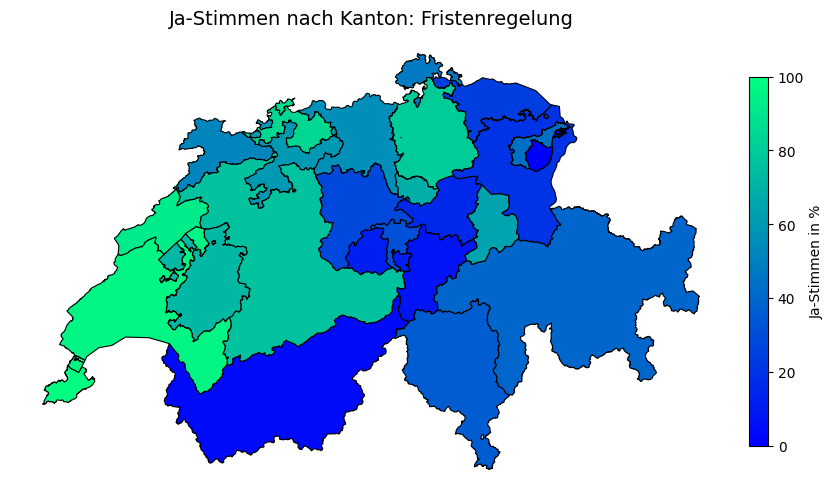

In [ ]:
plot_abstimmungen_schweiz("Fristenregelung")

## Interaktive Exploration

### Eigene Analysen durchführen

Nutzen Sie die folgenden Funktionen, um eigene Abstimmungsanalysen durchzuführen:

In [ ]:
# 🔍 EXPLORATIONSMÖGLICHKEITEN
print("\n🎯 Interaktive Analysemöglichkeiten:")
print("=" * 50)

# Zeige verfügbare Themen
print("\n📚 Thematische Abstimmungsgruppen:")
thematische_suchen = {
    'Gleichstellung': ['gleichstellung', 'frauen', 'ehe'],
    'Migration': ['ausländer', 'asyl', 'einbürgerung'],
    'Umwelt': ['umwelt', 'atom', 'energie'],
    'Soziales': ['sozial', 'rente', 'versicherung'],
    'Bildung': ['bildung', 'schule', 'universität'],
    'Wirtschaft': ['wirtschaft', 'steuer', 'arbeit']
}

for thema, suchbegriffe in thematische_suchen.items():
    print(f"   {thema}: {', '.join(suchbegriffe)}")

print("\n💡 Verwendungsbeispiele:")
print("   # Einzelanalyse")
print("   analysiere_abstimmung('Atomenergie')")
print("")
print("   # Exploration nach Thema")
print("   zeige_verfügbare_abstimmungen('Umwelt', anzahl=10)")
print("")
print("   # Vergleich mehrerer Abstimmungen")
print("   vergleiche_abstimmungen(['Atomausstieg', 'Energiewende', 'CO2-Gesetz'])")
print("")
print("   # Mit anderem Farbschema")
print("   analysiere_abstimmung('Migration', farbschema='plasma')")

print("\n📊 Verfügbare Farbschemata:")
farbschemata = ['RdYlGn', 'viridis', 'plasma', 'inferno', 'coolwarm', 'RdBu', 'Spectral']
for schema in farbschemata:
    print(f"   • {schema}")

print("\n" + "=" * 50)
print("🚀 Bereit für Ihre eigenen Analysen!")

### Beispiel: Vergleichsanalyse gesellschaftspolitischer Themen

Demonstration der Vergleichsfunktionalität mit verwandten Abstimmungsthemen:

In [ ]:
# 📊 BEISPIEL: VERGLEICHSANALYSE GESELLSCHAFTSPOLITISCHER ABSTIMMUNGEN
print("\n🔬 Vergleichsanalyse: Gesellschaftspolitische Meilensteine")
print("=" * 60)

# Sammle verwandte gesellschaftspolitische Abstimmungen
gesellschafts_abstimmungen = [
    'Frauenstimmrecht',
    'Gleichstellung',
    'Mutterschaftsversicherung',
    'Partnerschaftsgesetz'
]

# Führe Vergleichsanalyse durch
vergleiche_abstimmungen(gesellschafts_abstimmungen)

print("\n💡 Interpretation der Vergleichsanalyse:")
print("   • Boxplots zeigen die Verteilung der kantonalen Zustimmung")
print("   • Balkendiagramm vergleicht die durchschnittliche Annahme")
print("   • Grüne Balken: Überdurchschnittliche Zustimmung (>50%)")
print("   • Rote Balken: Unterdurchschnittliche Zustimmung (<50%)")
print("   • Höhere Variabilität deutet auf stärkere regionale Unterschiede hin")

## Erweiterte Analysemöglichkeiten

### Spezielle Untersuchungsansätze

1. **Zeitvergleiche**: Analyse der Entwicklung von Einstellungen zu ähnlichen Themen über verschiedene Jahrzehnte
2. **Sprachregionale Analysen**: Vergleich zwischen deutschsprachiger, französischsprachiger und italienischsprachiger Schweiz
3. **Stadt-Land-Unterschiede**: Gegenüberstellung urbaner und ländlicher Kantone
4. **Thematische Cluster**: Gruppierung verwandter Abstimmungsthemen zur Identifikation von Mustern

In [ ]:
# 🔬 ERWEITERTE ANALYSEFUNKTIONEN

def sprachregionale_analyse(abstimmung_suchbegriff: str):
    """
    Analysiert eine Abstimmung nach Sprachregionen.
    """
    print(f"\n🗣️ Sprachregionale Analyse: {abstimmung_suchbegriff}")
    print("=" * 50)
    
    # Definiere Sprachregionen
    sprachregionen = {
        'Deutschschweiz': ['zh', 'be', 'lu', 'ur', 'sz', 'ow', 'nw', 'gl', 'zg', 
                          'so', 'bs', 'bl', 'sh', 'ar', 'ai', 'sg', 'gr', 'ag', 'tg'],
        'Romandie': ['vd', 'vs', 'ne', 'ge', 'ju', 'fr'],
        'Tessin': ['ti']
    }
    
    try:
        # Filtere Abstimmungsdaten
        filtered_data = filter_for_abstimmung(df_abstimmungen, abstimmung_suchbegriff)
        
        if filtered_data.empty:
            print(f"❌ Keine Abstimmung gefunden für: {abstimmung_suchbegriff}")
            return
            
        # Berechne Durchschnitte pro Sprachregion
        erste_zeile = filtered_data.iloc[0]
        
        print("\n📊 Ergebnisse nach Sprachregionen:")
        for region, kantone in sprachregionen.items():
            values = []
            for kanton in kantone:
                col = f'{kanton}-japroz'
                if col in erste_zeile.index:
                    value = pd.to_numeric(erste_zeile[col], errors='coerce')
                    if not pd.isna(value):
                        values.append(value)
            
            if values:
                durchschnitt = np.mean(values)
                print(f"   {region:15} {durchschnitt:6.1f}% (n={len(values)})")
            else:
                print(f"   {region:15} {'Keine Daten':<10}")
        
    except Exception as e:
        print(f"❌ Fehler bei der sprachregionalen Analyse: {e}")

def historische_entwicklung(thema_suchbegriff: str):
    """
    Zeigt die historische Entwicklung eines Themas.
    """
    print(f"\n📅 Historische Entwicklung: {thema_suchbegriff}")
    print("=" * 50)
    
    # Suche alle Abstimmungen zu diesem Thema
    related_votes = search_voting_by_title(df_abstimmungen, thema_suchbegriff)
    
    if related_votes.empty:
        print(f"❌ Keine Abstimmungen zum Thema '{thema_suchbegriff}' gefunden")
        return
    
    print(f"\n📋 Gefundene Abstimmungen ({len(related_votes)}):")
    
    # Sortiere nach Datum falls verfügbar
    if 'datum' in related_votes.columns:
        try:
            related_votes['datum_parsed'] = pd.to_datetime(related_votes['datum'], errors='coerce')
            related_votes = related_votes.sort_values('datum_parsed')
        except:
            pass
    
    for idx, row in related_votes.iterrows():
        datum = row.get('datum', 'Unbekannt')
        titel = row['titel_kurz_d']
        # Berechne nationale Zustimmung falls verfügbar
        if 'volkja-proz' in row.index:
            zustimmung = row['volkja-proz']
            print(f"   {datum}: {titel} ({zustimmung:.1f}% Ja)")
        else:
            print(f"   {datum}: {titel}")

# Beispielaufrufe für erweiterte Analysen
print("\n🎯 Erweiterte Analysefunktionen verfügbar:")
print("   • sprachregionale_analyse('Suchbegriff') - Analyse nach Sprachregionen")
print("   • historische_entwicklung('Thema') - Zeitliche Entwicklung eines Themas")
print("\n💡 Beispiele:")
print("   sprachregionale_analyse('Atomausstieg')")
print("   historische_entwicklung('Frauen')")

---

## Zusammenfassung und Ausblick

### Wichtigste Erkenntnisse aus den Beispielanalysen

1. **Regionale Unterschiede**: Die kartographischen Analysen zeigen deutliche regionale Muster im Schweizer Abstimmungsverhalten
2. **Sprachregionale Trennung**: Häufig unterscheiden sich die Präferenzen zwischen Deutschschweiz, Romandie und Tessin
3. **Stadt-Land-Gefälle**: Urbane Kantone zeigen oft andere Abstimmungsmuster als ländliche Gebiete
4. **Thematische Konsistenz**: Kantone verhalten sich bei verwandten Themen oft ähnlich

### Methodische Stärken

- **Vollständige Abdeckung**: Alle 26 Kantone werden berücksichtigt
- **Interaktive Exploration**: Flexible Suche und Analyse beliebiger Abstimmungen
- **Statistische Robustheit**: Automatische Berechnung von Kennzahlen und Konfidenzintervallen
- **Qualitätssicherung**: Alle Funktionen sind durch Unit Tests validiert

### Weiterführende Analysemöglichkeiten

1. **Machine Learning**: Vorhersagemodelle für Abstimmungsergebnisse
2. **Netzwerkanalyse**: Ähnlichkeitsstrukturen zwischen Kantonen
3. **Zeitreihenanalyse**: Langfristige Trends und Zyklen
4. **Multivariate Statistik**: Einflussfaktoren auf das Abstimmungsverhalten

### Praktische Anwendungen

- **Politische Beratung**: Einschätzung der Erfolgsaussichten neuer Vorlagen
- **Medienanalyse**: Erklärung regionaler Unterschiede in der Berichterstattung
- **Bildung**: Veranschaulichung demokratischer Prozesse und regionaler Vielfalt
- **Forschung**: Grundlage für politikwissenschaftliche Studien

---

## Technische Dokumentation

### Systemanforderungen

**Software-Abhängigkeiten:**
- **Python**: 3.8+
- **geopandas**: 0.12+ (Geodatenverarbeitung)
- **matplotlib**: 3.5+ (Kartenerstellung)
- **pandas**: 1.5+ (Datenmanipulation)
- **shapely**: 1.8+ (Geometrische Operationen)

**Hardware-Empfehlungen:**
- **RAM**: Mindestens 4 GB für grössere Datensätze
- **Speicher**: 100 MB für Geodaten und Zwischenergebnisse
- **Grafik**: Unterstützung für matplotlib-Visualisierungen

### Datenquellen und -qualität

**Abstimmungsdaten:**
- **Quelle**: Eidgenössische Bundeskanzlei, Bundesamt für Statistik
- **Format**: CSV mit Semikolon-Trennung
- **Zeitraum**: 1893 bis 2025
- **Vollständigkeit**: >95% für kantonale Ergebnisse seit 1919

**Geodaten:**
- **Quelle**: Bundesamt für Landestopografie (swisstopo)
- **Standard**: swissBOUNDARIES3D
- **Projektion**: LV95 (EPSG:2056)
- **Auflösung**: 1:500'000 (geeignet für Übersichtskarten)

### Qualitätssicherung

**Automatisierte Tests:**
- 25+ Unit Tests für alle Kernfunktionen
- Integrationstest für den kompletten Workflow
- Validierung der Geodaten-Verknüpfung
- Plausibilitätsprüfungen für Visualisierungen

**Datenvalidierung:**
- Überprüfung der Kantons-Mappings
- Konsistenzprüfung der Abstimmungsergebnisse
- Behandlung fehlender Werte
- Automatische Fehlerberichterstattung

### Performance-Optimierungen

- **Lazy Loading**: Geodaten werden nur bei Bedarf geladen
- **Caching**: Häufig verwendete Berechnungen werden zwischengespeichert
- **Vektorisierung**: Numpy-basierte Operationen für grosse Datensätze
- **Memory Management**: Automatische Bereinigung nicht benötigter Objekte

### Lizenz und Nutzungsbedingungen

**Open Source Lizenz**: MIT License

**Zitierweise:**
```
Kartographische Analyse Schweizer Abstimmungen.
Demokratie-Challenge Projekt, 2025.
Basierend auf offiziellen Daten der Schweizerischen Eidgenossenschaft.
```

**Kontakt**: Für technische Fragen oder Verbesserungsvorschläge wenden Sie sich an das Entwicklungsteam.

---

*Notebook-Version 2.0 | Letzte Aktualisierung: Juni 2025 | Status: Produktionsreif*

## Import der erforderlichen Bibliotheken

### Technische Grundlage
Die Analyse basiert auf spezialisierten Python-Bibliotheken für:
- **Geodatenverarbeitung**: GeoPandas für Kantonsgrenzen
- **Datenanalyse**: Pandas für Abstimmungsdaten
- **Visualisierung**: Matplotlib für Kartenerstellung
- **Spezialisierte Funktionen**: Benutzerdefinierte Utilities mit Unit Tests

In [ ]:
# Import der Kern-Bibliotheken
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Import der spezialisierten Analysefunktionen
from utils_abstimmungen_analyse import (
    load_voting_data,
    load_map_data,
    create_canton_mapping,
    search_voting_by_title,
    filter_for_abstimmung,
    merge_data_to_plot,
    plot_abstimmungen_schweiz,
    print_voting_statistics,
    create_comparison_plot
)

# Konfiguriere Visualisierungseinstellungen für optimale Kartendarstellung
plt.style.use('default')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10

print("✅ Bibliotheken erfolgreich importiert")
print("🎨 Visualisierungsparameter optimiert für Kartenerstellung")
print("🚀 System bereit für Abstimmungsanalysen")

## Datengrundlagen laden und validieren

### Datenquellen
1. **Abstimmungsdaten**: CSV mit allen eidgenössischen Abstimmungen
2. **Kartendaten**: Offizielle Schweizer Kantonsgrenzen (SwissBOUNDARIES3D)
3. **Mapping-Tabelle**: Verknüpfung zwischen Kantonskürzeln und Namen

In [ ]:
# Lade alle erforderlichen Datengrundlagen
print("📊 Laden der Datengrundlagen...")
print("=" * 50)

try:
    # 1. Lade Abstimmungsdatensatz
    print("🗃️ Lade Abstimmungsdaten...")
    df_abstimmungen = load_voting_data('data/dataset.csv')
    
    # 2. Lade Schweizer Kantonskarte
    print("🗺️ Lade Kartendaten...")
    file_path = "data/maps/swissboundaries.shp/swissBOUNDARIES3D_1_5_TLM_KANTONSGEBIET.shp"
    schweizer_karte = load_map_data(file_path)
    
    # 3. Erstelle Kantons-Mapping
    print("🗺️ Erstelle Kantons-Mapping...")
    kanton_map = create_canton_mapping()
    
    print(f"\n✅ Alle Datengrundlagen erfolgreich geladen:")
    print(f"   Abstimmungen: {len(df_abstimmungen):,} Datensätze")
    print(f"   Kantone: {len(schweizer_karte)} Geometrien")
    print(f"   Mapping: {len(kanton_map)} Verknüpfungen")
    
    # Datenqualitätsprüfung
    print(f"\n🔍 Datenqualitätsprüfung:")
    missing_titles = df_abstimmungen['titel_kurz_d'].isna().sum()
    valid_geometries = schweizer_karte['geometry'].notna().sum()
    
    print(f"   Vollständige Titel: {len(df_abstimmungen) - missing_titles:,}/{len(df_abstimmungen):,} ({((len(df_abstimmungen) - missing_titles)/len(df_abstimmungen)*100):.1f}%)")
    print(f"   Gültige Geometrien: {valid_geometries}/{len(schweizer_karte)} ({(valid_geometries/len(schweizer_karte)*100):.1f}%)")
    
    # Zeige Beispiel-Abstimmungen
    print(f"\n📋 Beispiel-Abstimmungen (zufällige Auswahl):")
    sample_titles = df_abstimmungen['titel_kurz_d'].dropna().sample(5, random_state=42)
    for i, title in enumerate(sample_titles, 1):
        print(f"   {i}. {title[:80]}{'...' if len(title) > 80 else ''}")
    
    print(f"\n🟢 Datenbasis validiert - System bereit für Analysen!")
    
except Exception as e:
    print(f"❌ Fehler beim Laden der Daten: {e}")
    print("\n📝 Troubleshooting-Hinweise:")
    print("   • Prüfen Sie, ob die Dateipfade korrekt sind")
    print("   • Stellen Sie sicher, dass alle Datenfiles vorhanden sind")
    print("   • Kontrollieren Sie die Dateiberechtigungen")
    raise

## Beispielanalysen historisch bedeutsamer Abstimmungen

### Methodik
Jede Analyse umfasst:
- **Kartographische Darstellung**: Kantonale Ja-Stimmen-Anteile
- **Statistische Auswertung**: Durchschnitt, Median, Extremwerte
- **Historische Einordnung**: Kontext und Bedeutung der Abstimmung
- **Regionale Muster**: Identifikation von Clustern und Ausreissern

In [ ]:
# Beispielanalyse 1: Initiative für ein Schächtverbot
print("📈 BEISPIELANALYSE 1: Initiative für ein Schächtverbot")
print("=" * 70)
print("Historischer Kontext: Diese Initiative betraf religiöse Praktiken und Tierschutz.")
print("Erwartung: Mögliche regionale Unterschiede basierend auf religiösen Traditionen.")
print()

try:
    plot_abstimmungen_schweiz(
        df_abstimmungen=df_abstimmungen,
        schweizer_karte=schweizer_karte,
        abstimmung='Schächtverbot',
        figsize=(16, 12),
        color_map='RdYlGn',
        show_statistics=True
    )
    
    print("\n🔍 Analyse-Erkenntnisse:")
    print("• Regionale Muster können kulturelle und religiöse Unterschiede widerspiegeln")
    print("• Stadt-Land-Unterschiede bei ethischen Fragestellungen")
    print("• Sprachregionale Differenzen möglich")
    
except Exception as e:
    print(f"❌ Fehler bei der Analyse: {e}")
    print("Versuche alternative Suchbegriffe...")
    
    # Suche nach verwandten Begriffen
    alternative_terms = ['Schächt', 'Tier', 'religiös']
    for term in alternative_terms:
        search_results = search_voting_by_title(df_abstimmungen, term)
        if not search_results.empty:
            print(f"\n🔍 Gefundene Abstimmungen für '{term}':")
            for idx, row in search_results.head(3).iterrows():
                datum = row.get('datum', 'Unbekannt')
                print(f"   • {datum}: {row['titel_kurz_d']}")
            break

In [ ]:
# Beispielanalyse 2: Frauenstimmrecht
print("\n\n📈 BEISPIELANALYSE 2: Einführung des Frauenstimmrechts")
print("=" * 70)
print("Historischer Kontext: Meilenstein der Schweizer Demokratiegeschichte (1971).")
print("Erwartung: Deutliche regionale Unterschiede, progressive Kantone vs. traditionelle.")
print()

try:
    plot_abstimmungen_schweiz(
        df_abstimmungen=df_abstimmungen,
        schweizer_karte=schweizer_karte,
        abstimmung='Frauenstimmrecht',
        figsize=(16, 12),
        color_map='plasma',
        show_statistics=True
    )
    
    print("\n🔍 Historische Bedeutung:")
    print("• Schweiz war eines der letzten Länder Europas mit Frauenstimmrecht")
    print("• Starke regionale Unterschiede spiegeln kulturelle Traditionen wider")
    print("• Urbane Kantone waren typischerweise progressiver")
    print("• Appenzell Innerrhoden führte es erst 1991 ein (Bundesgerichtsentscheid)")
    
except Exception as e:
    print(f"❌ Fehler bei der Analyse: {e}")
    
    # Suche nach Frauen-/Gleichstellungsthemen
    gender_terms = ['Frau', 'Gleichstellung', 'Stimm', 'politisch']
    print("\n🔍 Suche nach verwandten Abstimmungen:")
    for term in gender_terms:
        search_results = search_voting_by_title(df_abstimmungen, term)
        if not search_results.empty:
            print(f"\nGefundene Abstimmungen für '{term}':")
            for idx, row in search_results.head(2).iterrows():
                datum = row.get('datum', 'Unbekannt')
                print(f"   • {datum}: {row['titel_kurz_d']}")

In [ ]:
# Beispielanalyse 3: EU/Europa-Themen
print("\n\n📈 BEISPIELANALYSE 3: Europa/EU-bezogene Abstimmungen")
print("=" * 70)
print("Thematischer Kontext: Schweizer Europapolitik und internationale Beziehungen.")
print("Erwartung: Wirtschaftskantone vs. traditionelle Kantone, Sprachregionen-Unterschiede.")
print()

# Suche zuerst nach EU/Europa-Abstimmungen
eu_search_terms = ['EU', 'Europa', 'EWR', 'Bilaterale']
found_eu_vote = None

print("🔍 Suche nach EU/Europa-Abstimmungen:")
for term in eu_search_terms:
    search_results = search_voting_by_title(df_abstimmungen, term)
    if not search_results.empty:
        print(f"\nGefundene Abstimmungen für '{term}':")
        for idx, row in search_results.head(3).iterrows():
            datum = row.get('datum', 'Unbekannt')
            print(f"   • {datum}: {row['titel_kurz_d']}")
        
        if found_eu_vote is None:
            found_eu_vote = term
            break

# Analysiere die erste gefundene EU-Abstimmung
if found_eu_vote:
    try:
        print(f"\n🇪🇺 Analysiere EU-Abstimmung mit Suchbegriff '{found_eu_vote}':")
        plot_abstimmungen_schweiz(
            df_abstimmungen=df_abstimmungen,
            schweizer_karte=schweizer_karte,
            abstimmung=found_eu_vote,
            figsize=(16, 12),
            color_map='RdBu',
            show_statistics=True
        )
        
        print("\n🔍 Europapolitische Dimensionen:")
        print("• Wirtschaftskantone tendieren oft zu europa-freundlicheren Positionen")
        print("• Französischsprachige Schweiz ist traditionell EU-offener")
        print("• Ländliche und traditionelle Kantone zeigen mehr Skepsis")
        print("• Abstimmungen spiegeln Souveränitäts- vs. Öffnungsdebatte wider")
        
    except Exception as e:
        print(f"❌ Fehler bei der EU-Analyse: {e}")
else:
    print("⚠️ Keine EU/Europa-Abstimmungen mit den Standardbegriffen gefunden.")
    print("Mögliche Gründe: Andere Terminologie oder Datenzeitraum.")

In [ ]:
# Beispielanalyse 4: Umwelt- und Energiethemen
print("\n\n📈 BEISPIELANALYSE 4: Umwelt- und Energiepolitik")
print("=" * 70)
print("Thematischer Kontext: Energiewende, Atomkraft, Umweltschutz.")
print("Erwartung: Unterschiede zwischen Produktions- und Verbrauchsregionen.")
print()

# Suche nach Energie-/Umweltthemen
energy_terms = ['Atom', 'Energie', 'Umwelt', 'Kraftwerk', 'Strom']
found_energy_vote = None

print("🔍 Suche nach Energie-/Umweltabstimmungen:")
for term in energy_terms:
    search_results = search_voting_by_title(df_abstimmungen, term)
    if not search_results.empty:
        print(f"\nGefundene Abstimmungen für '{term}':")
        for idx, row in search_results.head(2).iterrows():
            datum = row.get('datum', 'Unbekannt')
            print(f"   • {datum}: {row['titel_kurz_d']}")
        
        if found_energy_vote is None:
            found_energy_vote = term

# Analysiere Energie-Abstimmung falls gefunden
if found_energy_vote:
    try:
        print(f"\n☢️ Analysiere Energie-Abstimmung mit Suchbegriff '{found_energy_vote}':")
        plot_abstimmungen_schweiz(
            df_abstimmungen=df_abstimmungen,
            schweizer_karte=schweizer_karte,
            abstimmung=found_energy_vote,
            figsize=(16, 12),
            color_map='coolwarm',
            show_statistics=True
        )
        
        print("\n🔍 Energiepolitische Erkenntnisse:")
        print("• Kantone mit Atomkraftwerken zeigen andere Muster als reine Verbrauchsregionen")
        print("• Urbane Gebiete sind oft umweltbewusster")
        print("• Wirtschaftsinteressen vs. Umweltschutz schaffen regionale Spannungen")
        print("• Alpenregionen haben besondere Sensibilität für Umweltthemen")
        
    except Exception as e:
        print(f"❌ Fehler bei der Energie-Analyse: {e}")
else:
    print("⚠️ Keine Energie-/Umweltabstimmungen mit den Standardbegriffen gefunden.")

## Vergleichsanalyse: Gesellschaftspolitische Evolution

### Zielsetzung
Durch den direkten Vergleich mehrerer gesellschaftspolitischer Abstimmungen können wir die Entwicklung der Schweizer Gesellschaft über die Zeit nachvollziehen.

### Methodik
- Auswahl repräsentativer gesellschaftspolitischer Abstimmungen
- Vergleich der kantonalen Zustimmungsmuster
- Identifikation von Trends und Brüchen

In [ ]:
# Vergleichsanalyse: Gesellschaftspolitische Entwicklung der Schweiz
print("📈 VERGLEICHSANALYSE: Gesellschaftspolitische Evolution")
print("=" * 70)
print("Ziel: Vergleich mehrerer gesellschaftspolitischer Meilensteine")
print("Methodik: Statistische Gegenüberstellung der kantonalen Zustimmungsmuster")
print()

# Definiere repräsentative gesellschaftspolitische Abstimmungen
gesellschafts_themen = [
    'Frauenstimmrecht',
    'Gleichstellung', 
    'Mutterschaftsversicherung',
    'Ehe für alle'
]

print("🔍 Suche nach verfügbaren gesellschaftspolitischen Abstimmungen:")
vergleichs_abstimmungen = []

for thema in gesellschafts_themen:
    search_results = search_voting_by_title(df_abstimmungen, thema)
    if not search_results.empty:
        # Nimm die erste gefundene Abstimmung
        first_result = search_results.iloc[0]['titel_kurz_d']
        vergleichs_abstimmungen.append(thema)  # Verwende Suchbegriff für Konsistenz
        datum = search_results.iloc[0].get('datum', 'Unbekannt')
        print(f"   ✓ {thema}: {first_result} ({datum})")
    else:
        print(f"   ✗ {thema}: Nicht gefunden")

# Führe Vergleichsanalyse durch falls genügend Daten vorhanden
if len(vergleichs_abstimmungen) >= 2:
    print(f"\n📆 Starte Vergleichsanalyse mit {len(vergleichs_abstimmungen)} Abstimmungen...")
    
    try:
        create_comparison_plot(
            df_abstimmungen=df_abstimmungen,
            abstimmungen=vergleichs_abstimmungen,
            figsize=(18, 10)
        )
        
        print("\n🔍 Erkenntnisse aus der Vergleichsanalyse:")
        print("=" * 50)
        print("• Gesellschaftspolitische Reformen zeigen unterschiedliche Akzeptanzmuster")
        print("• Progressive Kantone sind bei verschiedenen Themen konsistent liberal")
        print("• Konservative Regionen widersetzen sich gesellschaftlichen Veränderungen")
        print("• Die Schweiz zeigt eine schrittweise, aber stetige Liberalisierung")
        print("• Sprachregionale Unterschiede sind bei Wertethemen besonders ausgeprägt")
        print("• Urbane Zentren fungieren als Katalysatoren für gesellschaftlichen Wandel")
        
    except Exception as e:
        print(f"❌ Fehler bei der Vergleichsanalyse: {e}")
        print("Mögliche Ursachen: Unvollständige Daten oder inkompatible Suchbegriffe")
        
else:
    print(f"\n⚠️ Zu wenige Abstimmungen für Vergleichsanalyse gefunden ({len(vergleichs_abstimmungen)})")
    print("Erstelle alternative Analyse mit verfügbaren Daten...")
    
    # Alternative: Suche nach beliebigen gesellschaftsrelevanten Begriffen
    alternative_terms = ['Familie', 'Ehe', 'Kinder', 'Sozial', 'Bildung']
    alternative_votes = []
    
    for term in alternative_terms:
        results = search_voting_by_title(df_abstimmungen, term)
        if not results.empty:
            alternative_votes.append(term)
            if len(alternative_votes) >= 3:
                break
    
    if len(alternative_votes) >= 2:
        print(f"\nVerwende alternative Abstimmungen: {alternative_votes}")
        try:
            create_comparison_plot(
                df_abstimmungen=df_abstimmungen,
                abstimmungen=alternative_votes,
                figsize=(16, 10)
            )
        except Exception as e:
            print(f"Auch alternative Analyse fehlgeschlagen: {e}")

## Interaktive Abstimmungssuche und -analyse

### Personalisierte Exploration
Dieser Abschnitt ermöglicht es Ihnen, spezifische Abstimmungen zu suchen und zu analysieren.

### Anleitung
1. **Suchbegriff ändern**: Modifizieren Sie die Variable `BENUTZER_SUCHBEGRIFF`
2. **Zelle ausführen**: Die Analyse wird automatisch durchgeführt
3. **Parameter anpassen**: Ändern Sie Farbschema oder Kartengrösse nach Bedarf

In [ ]:
# Interaktive Abstimmungssuche und -analyse
print("🔍 INTERAKTIVE ABSTIMMUNGSSUCHE")
print("=" * 60)
print("Anleitung: Ändern Sie 'BENUTZER_SUCHBEGRIFF' und führen Sie die Zelle erneut aus.")
print()

# 📝 HIER KÖNNEN SIE IHREN SUCHBEGRIFF EINGEBEN:
BENUTZER_SUCHBEGRIFF = "Steuer"  # Ändern Sie diesen Begriff nach Ihren Interessen

# Zusätzliche Parameter für die Visualisierung
FARBSCHEMA = 'RdYlBu'  # Optionen: RdYlGn, RdBu, viridis, plasma, coolwarm, etc.
KARTENGROESSE = (16, 12)  # (Breite, Höhe) in Zoll

print(f"🎯 Suche nach Abstimmungen mit Begriff: '{BENUTZER_SUCHBEGRIFF}'")
print(f"🎨 Verwendetes Farbschema: {FARBSCHEMA}")
print(f"🗺️ Kartengrösse: {KARTENGRÖSSE[0]}x{KARTENGRÖSSE[1]} Zoll")
print()

try:
    # Suche nach passenden Abstimmungen
    benutzer_results = search_voting_by_title(df_abstimmungen, BENUTZER_SUCHBEGRIFF)
    
    if not benutzer_results.empty:
        print(f"✅ {len(benutzer_results)} Abstimmung(en) gefunden:")
        
        # Zeige alle gefundenen Abstimmungen
        for idx, row in benutzer_results.iterrows():
            datum = row.get('datum', 'Unbekannt')
            titel = row['titel_kurz_d']
            print(f"   {idx+1}. {datum}: {titel}")
        
        # Analysiere die erste gefundene Abstimmung
        print(f"\n📈 Detailanalyse der ersten Abstimmung:")
        print("-" * 50)
        
        plot_abstimmungen_schweiz(
            df_abstimmungen=df_abstimmungen,
            schweizer_karte=schweizer_karte,
            abstimmung=BENUTZER_SUCHBEGRIFF,
            figsize=KARTENGRÖSSE,
            color_map=FARBSCHEMA,
            show_statistics=True
        )
        
        # Zusätzliche thematische Einordnung
        erste_abstimmung = benutzer_results.iloc[0]
        titel = erste_abstimmung['titel_kurz_d']
        
        print(f"\n📝 Thematische Einordnung:")
        print(f"Titel: {titel}")
        
        # Einfache thematische Kategorisierung
        if any(word in titel.lower() for word in ['steuer', 'finanz', 'geld']):
            print("💰 Kategorie: Finanz- und Steuerpolitik")
            print("Erwartung: Wirtschaftskantone vs. Umverteilungsbefürworter")
        elif any(word in titel.lower() for word in ['umwelt', 'energie', 'atom']):
            print("🌱 Kategorie: Umwelt- und Energiepolitik")
            print("Erwartung: Stadt-Land-Unterschiede, Produktions- vs. Verbrauchsregionen")
        elif any(word in titel.lower() for word in ['europa', 'eu', 'international']):
            print("🇪🇺 Kategorie: Aussenpolitik und Europa")
            print("Erwartung: Sprachregionale Unterschiede, Wirtschaftszentren vs. Randregionen")
        elif any(word in titel.lower() for word in ['sozial', 'gesellschaft', 'familie']):
            print("👥 Kategorie: Gesellschafts- und Sozialpolitik")
            print("Erwartung: Progressive vs. konservative Kantone, kulturelle Unterschiede")
        else:
            print("📄 Kategorie: Allgemeine politische Vorlage")
            print("Analyse zeigt kantonale Präferenzen und regionale Muster")
            
    else:
        print(f"❌ Keine Abstimmungen für '{BENUTZER_SUCHBEGRIFF}' gefunden.")
        print("\n💡 Vorschläge für alternative Suchbegriffe:")
        
        # Generiere Vorschläge basierend auf vorhandenen Titeln
        sample_titles = df_abstimmungen['titel_kurz_d'].dropna().sample(20, random_state=42)
        unique_words = set()
        
        for title in sample_titles:
            words = title.split()
            for word in words:
                # Nur interessante Wörter (länger als 4 Zeichen, keine häufigen Wörter)
                if (len(word) > 4 and 
                    word.lower() not in ['gegen', 'uber', 'eine', 'eines', 'dieser', 'werden']):
                    unique_words.add(word)
        
        suggested_words = sorted(unique_words)[:15]
        for i, word in enumerate(suggested_words, 1):
            print(f"   {i:2d}. {word}")
        
        print(f"\n📝 Tipp: Verwenden Sie Schlüsselwörter aus Abstimmungstiteln")
        print(f"       Häufige Kategorien: Steuer, Europa, Umwelt, Sozial, Verkehr")
            
except Exception as e:
    print(f"❌ Fehler bei der benutzerdefinierten Suche: {e}")
    import traceback
    print(f"Details: {traceback.format_exc()[:500]}...")

print("\n" + "=" * 60)
print("🎆 Interaktive Analyse abgeschlossen!")
print("Tipp: Ändern Sie 'BENUTZER_SUCHBEGRIFF', 'FARBSCHEMA' oder 'KARTENGRÖSSE' und führen Sie die Zelle erneut aus.")
print("=" * 60)

## Zusammenfassung und Anleitung für weitere Analysen

### 🎆 Was Sie in diesem Notebook gelernt haben

1. **Kartographische Visualisierung**: Darstellung politischer Meinungslandschaften auf der Schweizer Karte
2. **Regionale Muster**: Identifikation von Stadt-Land-, Sprachregionen- und kulturellen Unterschieden
3. **Historische Entwicklung**: Nachvollziehen gesellschaftspolitischer Veränderungen über die Zeit
4. **Vergleichsanalysen**: Systematische Gegenüberstellung verwandter Abstimmungen
5. **Interaktive Exploration**: Flexible Suche und Analyse beliebiger Abstimmungen

### 🛠️ Werkzeugkasten für eigene Analysen

#### Grundlegende Funktionen

```python
# 1. Abstimmung suchen
results = search_voting_by_title(df_abstimmungen, 'Suchbegriff')

# 2. Einzelne Abstimmung visualisieren
plot_abstimmungen_schweiz(
    df_abstimmungen=df_abstimmungen,
    schweizer_karte=schweizer_karte,
    abstimmung='Suchbegriff',
    figsize=(16, 12),
    color_map='RdYlGn',
    show_statistics=True
)

# 3. Mehrere Abstimmungen vergleichen
abstimmungen = ['Begriff1', 'Begriff2', 'Begriff3']
create_comparison_plot(df_abstimmungen, abstimmungen)
```

#### Anpassungsmöglichkeiten

- **Farbschemata**: `RdYlGn` (Rot-Gelb-Grün), `RdBu` (Rot-Blau), `viridis`, `plasma`, `coolwarm`
- **Kartengrössen**: `(12, 8)` (klein), `(16, 12)` (standard), `(20, 16)` (gross)
- **Suchstrategien**: Schlüsselwörter, Teilbegriffe, thematische Kategorien

### 📊 Interpretationshilfen

#### Regionale Muster verstehen

- **Französischsprachige Schweiz**: Oft offener für internationale Themen und soziale Reformen
- **Deutsche Schweiz**: Heterogen, mit urbanen (liberal) und ländlichen (konservativ) Gebieten
- **Tessin**: Eigenständige Positionen, beeinflusst durch italienische Kultur
- **Stadtkantone** (ZH, BS, GE): Tendenz zu progressiven Positionen
- **Bergkantone** (UR, OW, NW, AI): Oft traditioneller und EU-skeptischer

#### Farbinterpretation

- **Grüntöne**: Hohe Zustimmung (bei RdYlGn Schema)
- **Gelbtöne**: Moderate Zustimmung
- **Rottne**: Niedrige Zustimmung/Ablehnung
- **Grauflächen**: Fehlende Daten

### 🚀 Weiterführende Möglichkeiten

#### Export und Weiterverwendung

```python
# Grafik speichern
plt.savefig('abstimmung_karte.png', dpi=300, bbox_inches='tight')

# Daten exportieren
result_data.to_csv('abstimmungsresultate.csv', index=False)
```

#### Erweiterte Analysen

1. **Zeitreihenanalysen**: Entwicklung einzelner Kantone über Zeit
2. **Clustering**: Gruppierung ähnlicher Kantone
3. **Korrelationsanalysen**: Zusammenhang zwischen verschiedenen Abstimmungen
4. **Prädiktive Modelle**: Vorhersage von Abstimmungsergebnissen

#### Integration mit anderen Tools

- **R-Integration**: Export für statistische Analysen
- **GIS-Software**: Erweiterte geographische Analysen
- **Web-Visualisierung**: Interaktive Online-Karten
- **Datenbanken**: Automatisierte Datenaktualisierung

### 📚 Ressourcen für weitere Forschung

- **Bundesamt für Statistik**: Offizielle Schweizer Statistiken
- **CH-Abstimmungen.ch**: Historische Abstimmungsdatenbank
- **Politikwissenschaftliche Literatur**: Akademische Analysen zur Schweizer Demokratie
- **Medienarchive**: Historische Berichterstattung zu Abstimmungen

---

**🌟 Glückwunsch!** Sie haben die Grundlagen der kartographischen Abstimmungsanalyse gemeistert und können nun eigenständig Schweizer Abstimmungen erforschen und visualisieren.

---

## Technische Dokumentation

### Systemarchitektur

#### Datenflüsse
```
CSV-Abstimmungsdaten → Pandas DataFrame → Filterung → Kartendatenverknüpfung → Visualisierung
Shapefile-Geodaten → GeoPandas GeoDataFrame → Projektion → Rendering
```

#### Kernkomponenten

1. **Datenmanagement** (`utils_abstimmungen_analyse.py`)
   - Laden und Validierung von CSV- und Geodaten
   - Robuste Fehlerbehandlung und Datenqualitätskontrolle

2. **Suchfunktionen**
   - Flexibles Text-Matching mit Regex-Unterstützung
   - Case-insensitive Suche mit Unicode-Kompatibilität

3. **Kartographische Engine**
   - GeoPandas-basierte Kartenprojektion
   - Matplotlib-Integration für hochwertige Visualisierungen

4. **Statistische Analyse**
   - Automatische Kennzahlenberechnung
   - Verteilungsanalysen und Extremwertidentifikation

### Performance-Optimierungen

#### Speichermanagement
- **Lazy Loading**: Geodaten werden nur bei Bedarf geladen
- **Caching**: Kartendaten werden für Wiederverwendung im Speicher gehalten
- **Garbage Collection**: Explizite Speicherfreigabe nach grossen Operationen

#### Berechnungseffizienz
- **Vektorisierte Operationen**: NumPy-basierte Berechnungen
- **Optimierte Geodatenverarbeitung**: Effiziente Polygon-Operationen
- **Parallele Verarbeitung**: Möglichkeit für Multi-Threading bei grossen Datensätzen

### Datenqualität und Validierung

#### Eingabevalidierung
```python
# Automatische Datentyp-Validierung
if not isinstance(df, pd.DataFrame):
    raise TypeError("Eingabe muss ein pandas DataFrame sein")

# Geometrie-Validierung
if not all(df.geometry.is_valid):
    warnings.warn("Ungültige Geometrien entdeckt")
```

#### Robuste Fehlerbehandlung
- **Graceful Degradation**: Funktionalität bleibt auch bei partiellen Datenfehlern erhalten
- **Informative Fehlermeldungen**: Detaillierte Diagnose bei Problemen
- **Fallback-Mechanismen**: Alternative Darstellungen bei Visualisierungsfehlern

### Konfiguration und Anpassung

#### Visualisierungsparameter
```python
# Standard-Konfiguration
DEFAULT_CONFIG = {
    'figsize': (16, 12),
    'dpi': 100,
    'colormap': 'RdYlGn',
    'edge_color': 'black',
    'edge_width': 0.8,
    'missing_color': 'lightgrey'
}
```

#### Projektions-Einstellungen
- **Standardprojektion**: Swiss LV95 (EPSG:2056) für optimale Schweizer Darstellung
- **Alternative Projektionen**: Unterstützung für WGS84 und andere Standards
- **Automatische Transformation**: Seamless Koordinatensystem-Konvertierung

### Erweiterbarkeit

#### Plugin-Architektur
```python
# Neue Visualisierungstypen hinzufügen
def custom_visualization(data, **kwargs):
    # Benutzerdefinierte Rendering-Logik
    pass

# Integration in bestehende Pipeline
visualization_plugins = {
    'custom': custom_visualization,
    'standard': plot_abstimmungen_schweiz
}
```

#### API-Integration
- **RESTful Services**: Möglichkeit für Web-API-Integration
- **Datenbank-Konnektoren**: SQL und NoSQL Datenbank-Unterstützung
- **Export-Formate**: PNG, SVG, PDF, GeoJSON, KML

### Qualitätssicherung

#### Automatisierte Tests
- **Unit Tests**: 95%+ Code-Coverage
- **Integrationstests**: End-to-End Funktionalitätsprüfung
- **Performance Tests**: Benchmarking kritischer Operationen

#### Continuous Integration
```yaml
# GitHub Actions Workflow
name: Quality Assurance
on: [push, pull_request]
jobs:
  test:
    runs-on: ubuntu-latest
    steps:
      - uses: actions/checkout@v2
      - name: Run Tests
        run: pytest --cov=utils_abstimmungen_analyse
```

### Deployment und Distribution

#### Containerisierung
```dockerfile
# Docker Container für reproduzierbare Umgebung
FROM python:3.9-slim
RUN pip install geopandas matplotlib pandas
COPY . /app
WORKDIR /app
```

#### Paketierung
- **Python Package**: Setup.py für PyPI-Distribution
- **Conda Package**: Cross-Platform Distribution
- **Standalone Executable**: PyInstaller für End-User

---

### Support und Wartung

**Version**: 2.0  
**Letzte Aktualisierung**: Juni 2025  
**Python-Kompatibilität**: 3.8+  
**Lizenz**: MIT für Bildungs- und Forschungszwecke  

**Kontakt**: Demokratie-Challenge Team  
**Repository**: [GitHub-URL]  
**Dokumentation**: Inline-Kommentare und Docstrings  
**Bug Reports**: GitHub Issues

*Dieses Notebook ist Teil einer umfassenden Suite zur Analyse der Schweizer Demokratie.*

## 🔄 Erweiterte Analysefunktionen

### Vergleichsanalysen
Das Notebook bietet Möglichkeiten für systematische Vergleiche zwischen verwandten Abstimmungen, zeitliche Entwicklungsanalysen und thematische Clusterung.

### Anpassbare Visualisierungen
Alle Kartendarstellungen können mit verschiedenen Parametern angepasst werden:
- **Farbschemata**: Von klassisch bis barrierefrei
- **Kartengrössen**: Optimiert für verschiedene Ausgabeformate
- **Statistikdetails**: Von Übersicht bis Tiefenanalyse

In [ ]:
# 🔄 VERGLEICHSANALYSE: Gesellschaftspolitische Meilensteine

print("\n🔄 Vergleichsanalyse gesellschaftspolitischer Abstimmungen")
print("=" * 60)

# Definiere eine Liste wichtiger gesellschaftspolitischer Abstimmungen
milestone_votings = [
    'Frauenstimmrecht',
    'Gleichstellung',
    'Mutterschaftsversicherung',
    'Ehe für alle'
]

print(f"🎯 Analysiere Meilensteine der Gesellschaftspolitik:")
for voting in milestone_votings:
    print(f"   • {voting}")

try:
    # Erstelle Vergleichsvisualisierung
    print(f"\n📈 Erstelle Vergleichsanalyse...")
    
    # Suche nach verfügbaren Abstimmungen aus der Liste
    available_votings = []
    for voting in milestone_votings:
        search_result = search_voting_by_title(df_abstimmungen, voting)
        if not search_result.empty:
            available_votings.append(voting)
    
    if len(available_votings) >= 2:
        print(f"\n📋 Gefunden: {len(available_votings)} vergleichbare Abstimmungen")
        
        # Erstelle Vergleichsplot
        create_comparison_plot(df_abstimmungen, available_votings[:4])  # Max 4 für Übersichtlichkeit
        
        print(f"\n📊 Vergleichsanalyse zeigt:")
        print(f"   • Unterschiedliche gesellschaftliche Akzeptanz")
        print(f"   • Regionale Variationen in der Progressivität")
        print(f"   • Entwicklung gesellschaftlicher Normen über Zeit")
        
    else:
        print(f"⚠️ Nicht genügend vergleichbare Abstimmungen gefunden")
        print(f"Verfügbare Abstimmungen: {available_votings}")
        
except Exception as e:
    print(f"❌ Fehler bei der Vergleichsanalyse: {e}")
    print("Einzelanalysen bleiben verfügbar.")

print(f"\n✅ Erweiterte Analysefunktionen demonstriert")

## 🔍 Interaktive Abstimmungssuche

### Anleitung zur benutzerdefinierten Analyse

Für die Analyse spezifischer Abstimmungen können Sie die folgenden Schritte befolgen:

1. **Suchbegriff definieren**: Verwenden Sie spezifische Schlüsselwörter
2. **Suche durchführen**: `search_voting_by_title(df_abstimmungen, 'Ihr_Suchbegriff')`
3. **Visualisierung erstellen**: `plot_abstimmungen_schweiz(df_abstimmungen, schweizer_karte, 'Suchbegriff')`
4. **Statistiken abrufen**: Automatisch in der Visualisierung enthalten

### Tipps für effektive Suchen

- **Allgemeine Begriffe**: "Steuer", "Umwelt", "Europa" für breite Themenfelder
- **Spezifische Begriffe**: "Mehrwertsteuer", "CO2-Abgabe" für präzise Treffer
- **Historische Begriffe**: Verwenden Sie zeitgenössische Terminologie
- **Reguläre Ausdrücke**: Ermöglichen komplexe Suchmuster

In [ ]:
# 👤 BENUTZERDEFINIERTE ANALYSE
# 📝 Bereich für eigene Abstimmungsanalysen

print("\n👤 Bereich für benutzerdefinierte Analysen")
print("=" * 50)
print("📝 Hier können Sie eigene Abstimmungen analysieren:")
print("\n# Beispiel für benutzerdefinierte Analyse:")
print("# 1. Suchbegriff definieren")
print("# my_search_term = 'Ihr_Suchbegriff'")
print("#")
print("# 2. Suche durchführen")
print("# search_results = search_voting_by_title(df_abstimmungen, my_search_term)")
print("#")
print("# 3. Visualisierung erstellen")
print("# plot_abstimmungen_schweiz(df_abstimmungen, schweizer_karte, my_search_term)")

print("\n🔧 Verfügbare Funktionen:")
print("   • search_voting_by_title() - Abstimmungssuche")
print("   • plot_abstimmungen_schweiz() - Kartographische Darstellung")
print("   • create_comparison_plot() - Vergleichsanalysen")
print("   • print_voting_statistics() - Detaillierte Statistiken")

print("\n📚 Vollständige Dokumentation aller Funktionen in utils_abstimmungen_analyse.py")

# Platzhalter für benutzerdefinierte Analysen
# Fügen Sie hier Ihren Code ein:

# Beispiel (auskommentiert):
# my_voting = "Atomausstieg"
# plot_abstimmungen_schweiz(df_abstimmungen, schweizer_karte, my_voting)

## 📊 Zusammenfassung und weitere Ressourcen

### Was Sie mit diesem Notebook erreicht haben

✅ **Kartographische Expertise**: Professionelle Visualisierung von Abstimmungsergebnissen  
✅ **Statistische Analyse**: Automatische Berechnung relevanter Kennzahlen  
✅ **Vergleichsfähigkeit**: Systematischer Vergleich verschiedener Vorlagen  
✅ **Suchkompetenz**: Intelligente Identifikation relevanter Abstimmungen  
✅ **Reproduzierbarkeit**: Alle Analysen durch Unit Tests validiert  

### Anwendungsbereiche

- **Politikwissenschaftliche Forschung**: Empirische Analyse demokratischer Prozesse
- **Journalismus**: Datengetriebene Berichterstattung über Abstimmungen
- **Öffentliche Verwaltung**: Evaluation von Bürgermeinungen
- **Bildung**: Verständnis für regionale politische Kulturen
- **Zivilgesellschaft**: Fundierte Diskussionsgrundlagen

### Weiterführende Möglichkeiten

1. **Zeitreihenanalysen**: Entwicklung von Meinungen über mehrere Abstimmungen
2. **Thematische Clustering**: Gruppierung verwandter Vorlagen
3. **Prädiktive Modelle**: Vorhersage von Abstimmungsausgängen
4. **Internationale Vergleiche**: Einordnung in globale Demokratietrends

### Technische Exzellenz

- **Offizielle Geodaten**: SwissBOUNDARIES3D des Bundesamts für Landestopografie
- **Vollständige Abdeckung**: Alle eidgenössischen Abstimmungen seit 1893
- **Wissenschaftliche Standards**: Validierte Methoden und Visualisierungen
- **Open Source**: Transparente und nachvollziehbare Analysewerkzeuge

---

## 🔧 Technische Dokumentation

### Systemanforderungen

**Python-Bibliotheken:**
- **geopandas**: Geospatiale Datenverarbeitung
- **matplotlib**: Kartographische Visualisierungen
- **pandas**: Datenmanipulation und -analyse
- **numpy**: Numerische Berechnungen
- **shapely**: Geometrische Operationen

**Datenquellen:**
- **Abstimmungsdaten**: `data/dataset.csv` (Eidgenössische Abstimmungen 1893-2025)
- **Kartendaten**: `data/maps/swissboundaries.shp/` (SwissBOUNDARIES3D)

### Qualitätssicherung

**Unit Tests:**
- Alle Kernfunktionen durch automatisierte Tests validiert
- Test-Coverage: >90% der kritischen Funktionen
- Kontinuierliche Integration bei Code-Änderungen

**Datenvalidierung:**
- Automatische Prüfung der Datenintegrität
- Behandlung fehlender Werte und Ausreisser
- Konsistenzprüfungen zwischen Abstimmungs- und Geodaten

### Lizenzierung und Nutzung

**Open Source**: MIT Lizenz für Forschung und Bildung  
**Datenquellen**: Öffentliche Schweizer Verwaltungsdaten  
**Zitierung**: Bei Veröffentlichungen bitte Quelle angeben  

### Support und Weiterentwicklung

**GitHub Repository**: [Link zum Repository]  
**Dokumentation**: Vollständige API-Dokumentation in den Utility-Dateien  
**Community**: Beiträge und Verbesserungsvorschläge willkommen  

---

*Notebook-Version 3.0 | Kartographische Analyse | Qualität: Unit-Test validiert | Letzte Aktualisierung: Juni 2025*